# Lecture 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from skimage.morphology import *

In [2]:
plt.rcParams['image.cmap']='gray'
plt.rcParams['figure.figsize']=[16,9]

### Basic operations of binary morphology

The following test image is available [here](https://drive.google.com/file/d/158rtG35A5OjUMsifTMBnhNXxfwwEDdoj/view?usp=sharing).

In [3]:
I = io.imread('rocks.png')

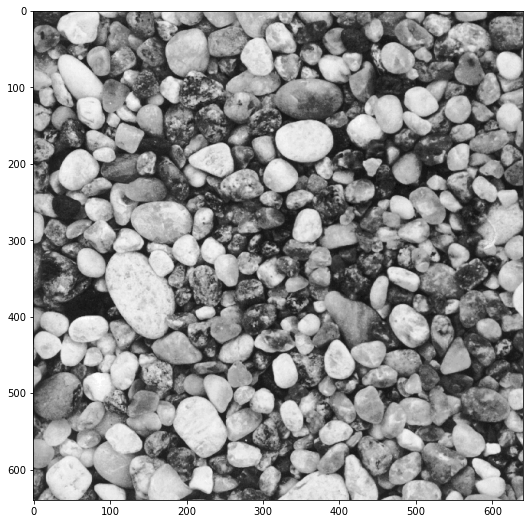

In [4]:
plt.imshow(I);

In [5]:
B = (I>210).astype(np.uint8)

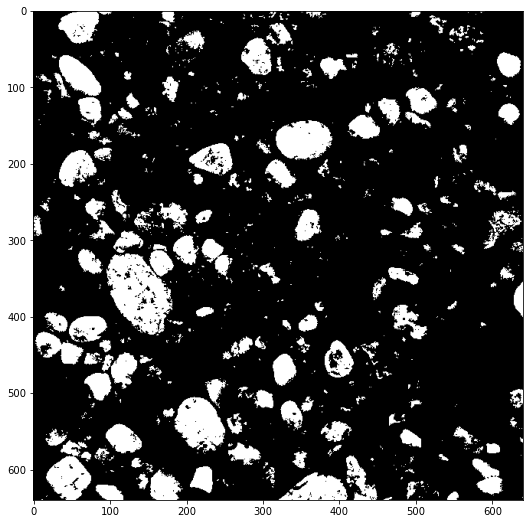

In [6]:
plt.imshow(B);

In [7]:
S = disk(2)

In [8]:
print(S)

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


In [9]:
E = binary_erosion(B,S)
D = binary_dilation(B,S)
O = binary_opening(B,S)
C = binary_closing(B,S)

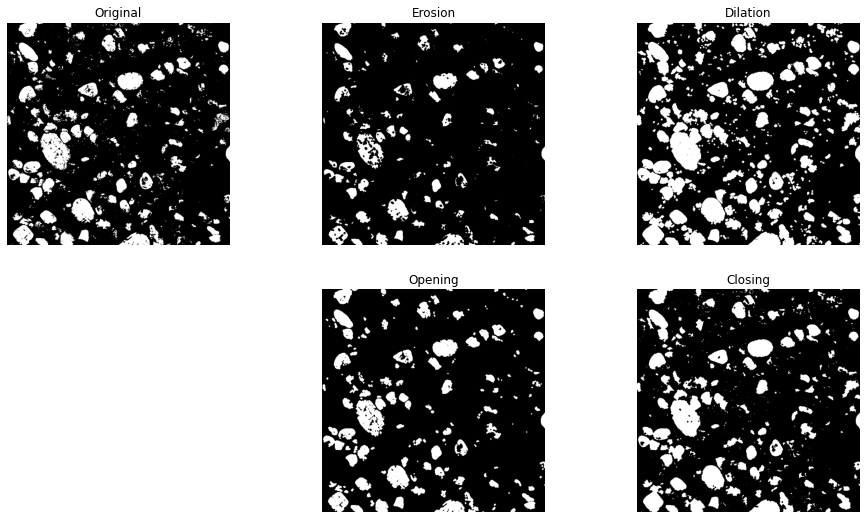

In [10]:
plt.subplot(231)
plt.imshow(B).axes.axis('off')
plt.title('Original')
plt.subplot(232)
plt.imshow(E).axes.axis('off')
plt.title('Erosion')
plt.subplot(233)
plt.imshow(D).axes.axis('off')
plt.title('Dilation')
plt.subplot(235)
plt.imshow(O).axes.axis('off')
plt.title('Opening')
plt.subplot(236)
plt.imshow(C).axes.axis('off')
plt.title('Closing');

### Boundary extraction

In [11]:
R = B - E

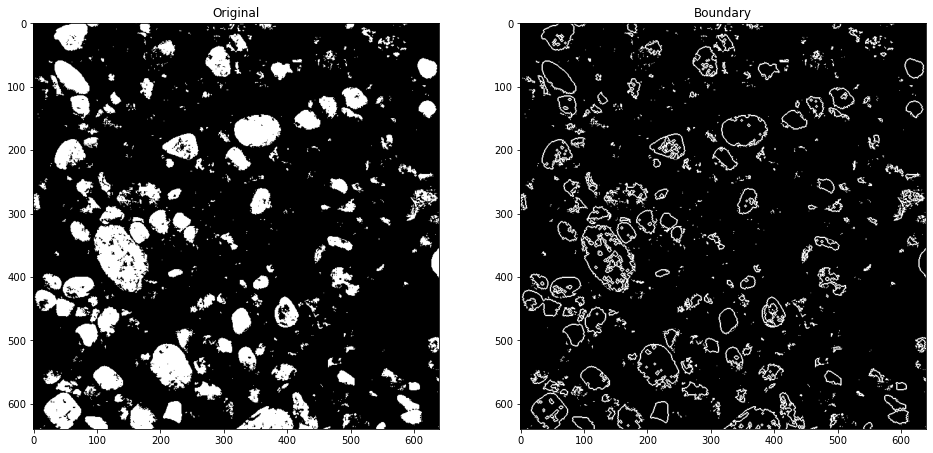

In [12]:
plt.subplot(1,2,1)
plt.imshow(B)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(R)
plt.title('Boundary');

### Connected component extraction

In [13]:
def conn_comp(I, p):
    X = np.zeros_like(I)
    X[p] = 1
    while(True):
        Xnew = np.bitwise_and(binary_dilation(X,disk(1)),I)
        if np.all(Xnew == X):
            break
        else:
            X = Xnew
    return X

In [14]:
p=(350,150)
X = conn_comp(B, p)

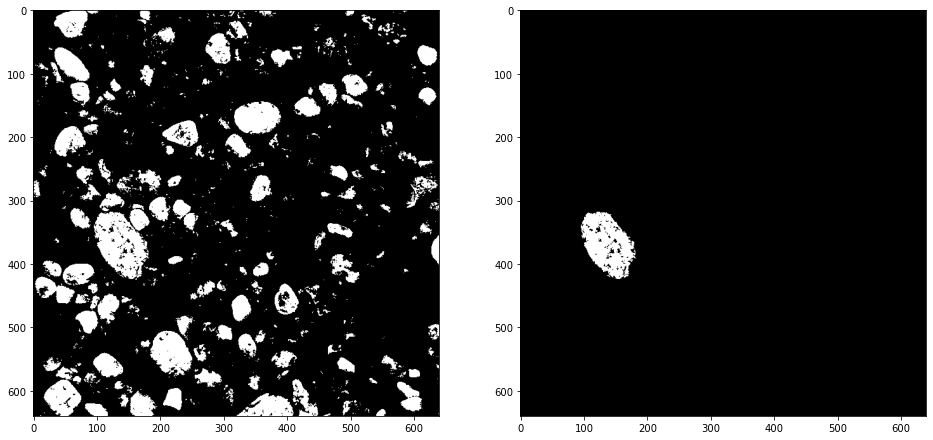

In [15]:
plt.subplot(121)
plt.imshow(B)
plt.subplot(122)
plt.imshow(X);

In [16]:
X = conn_comp(C, p)

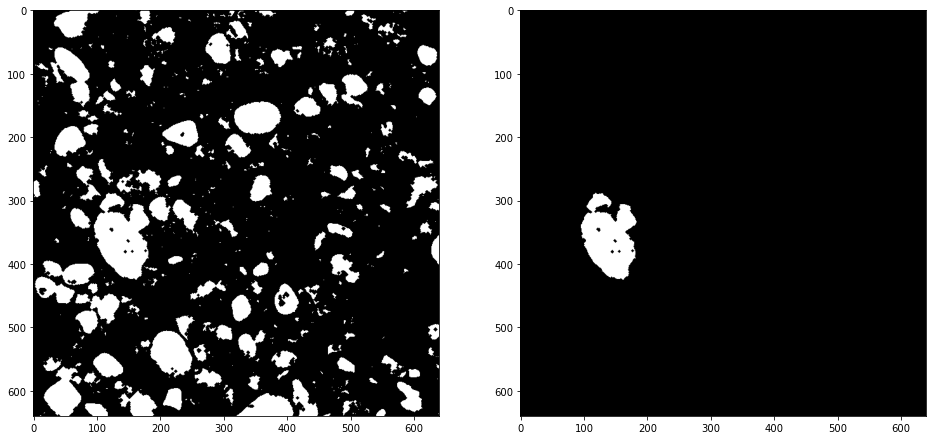

In [17]:
plt.subplot(121)
plt.imshow(C)
plt.subplot(122)
plt.imshow(X);

### Grayscale morphology

In [18]:
S = disk(3)

In [19]:
E = erosion(I,S)
D = dilation(I,S)
C = closing(I,S)
O = opening(I,S)

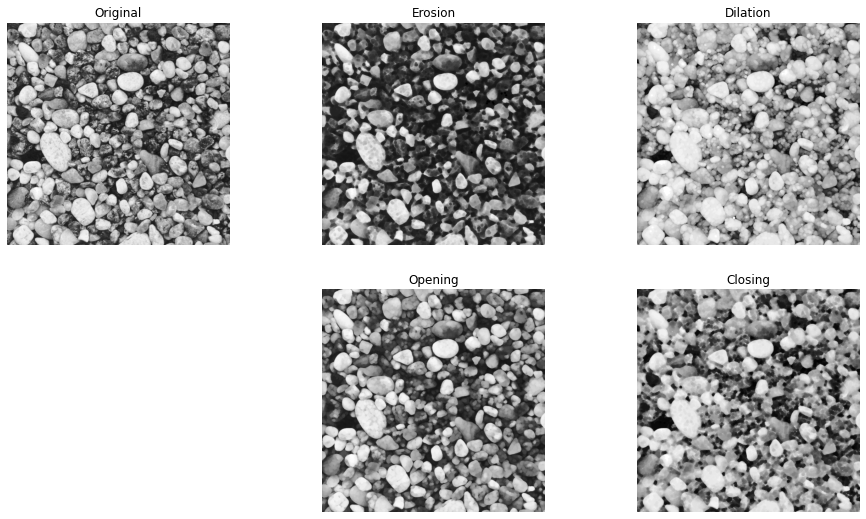

In [20]:
plt.subplot(231)
plt.imshow(I).axes.axis('off')
plt.title('Original')
plt.subplot(232)
plt.imshow(E).axes.axis('off')
plt.title('Erosion')
plt.subplot(233)
plt.imshow(D).axes.axis('off')
plt.title('Dilation')
plt.subplot(235)
plt.imshow(O).axes.axis('off')
plt.title('Opening')
plt.subplot(236)
plt.imshow(C).axes.axis('off')
plt.title('Closing');

### Morphological gradient

In [21]:
G = D - E

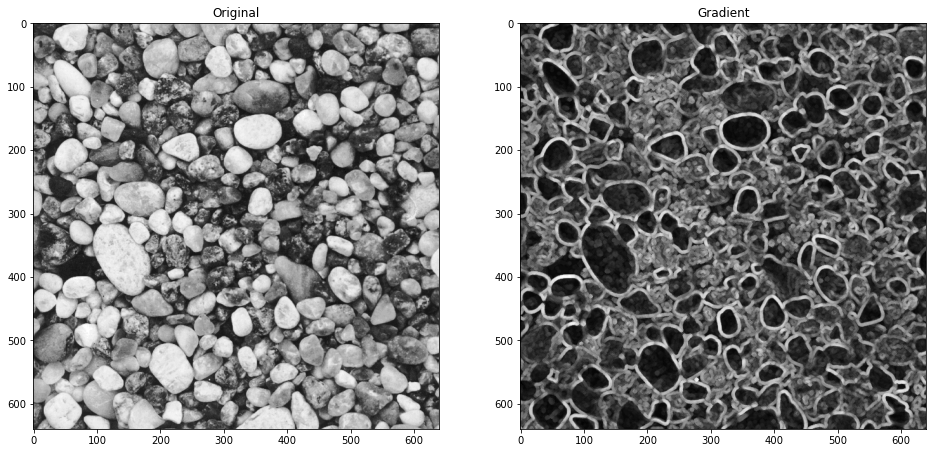

In [22]:
plt.subplot(121)
plt.imshow(I)
plt.title('Original')
plt.subplot(122)
plt.imshow(G)
plt.title('Gradient');